In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### EDA

In [2]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
pd.set_option("display.max_columns", None)

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5, 1.0, '0: No Fraud | 1: Fraud')

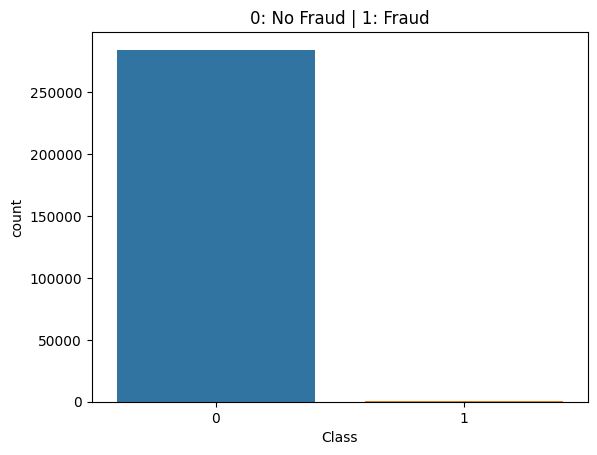

In [4]:
sns.countplot(df,x='Class')
plt.title('0: No Fraud | 1: Fraud')

In [5]:
df['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

<Axes: title={'center': 'Distribution of transaction amount'}, ylabel='Frequency'>

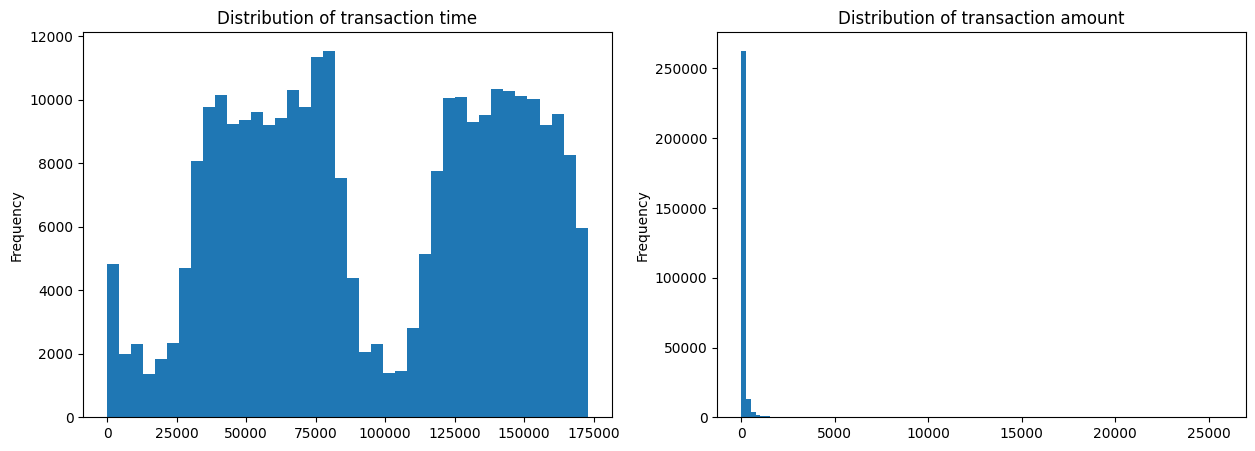

In [6]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
df['Time'].plot(kind='hist',bins=40,title='Distribution of transaction time',ax=ax[0])
df['Amount'].plot(kind='hist',ax=ax[1],bins=100,title='Distribution of transaction amount')


All the data have been scaled except time and amount columns

In [7]:

from sklearn.preprocessing import RobustScaler

scale=RobustScaler()

df['Time']=scale.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount']=scale.fit_transform(df['Amount'].values.reshape(-1,1))


In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


### undersampling

In [9]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['Class'])
y=df['Class']

X_train,X_holdout_,y_train,y_holdout=train_test_split(X,y,test_size=0.2,stratify=y)

In [10]:
new_df=pd.concat([X_train,y_train],axis=1)

In [11]:
#classes skewed so shuffling
new_df=new_df.sample(frac=1)

In [12]:
new_df['Class'].value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [13]:
# amount of fraud classes 394 rows.
fraud_df = new_df.loc[new_df['Class'] == 1]
non_fraud_df = new_df.loc[new_df['Class'] == 0][:394]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df],axis=0)
new_df=normal_distributed_df.sample(frac=1)

Text(0.5, 1.0, 'UNDERSAMPLING\n0: No Fraud | 1: Fraud')

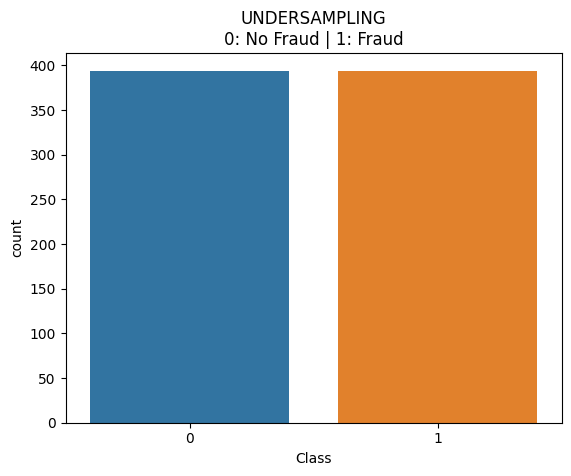

In [14]:
new_df['Class'].value_counts()
sns.countplot(new_df,x='Class')
plt.title('UNDERSAMPLING\n0: No Fraud | 1: Fraud')


Text(0.5, 1.0, 'balance data')

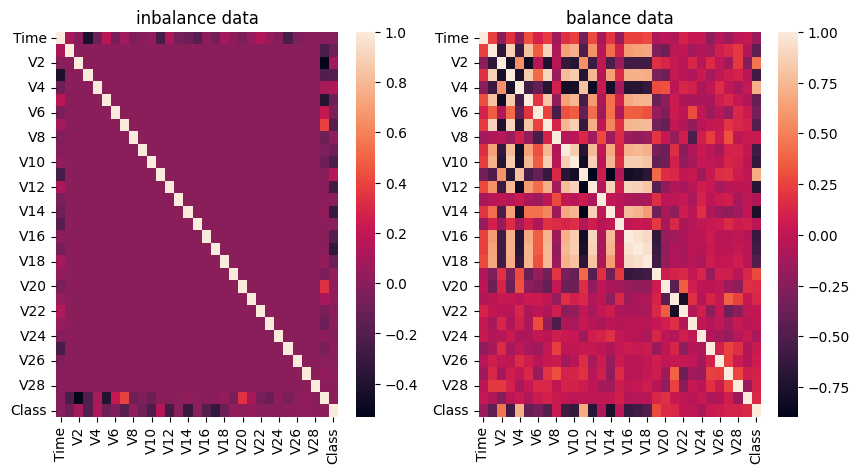

In [15]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.heatmap(df.corr(),ax=ax[0])
ax[0].set_title('inbalance data')

sns.heatmap(new_df.corr(),ax=ax[1])
ax[1].set_title('balance data')

highly means either<-0.5 or >0.5

In [16]:
highly_neg_corr_features=new_df.corr()['Class'].sort_values()[:4]
print(highly_neg_corr_features)
print(f'highly_neg_corr_features: {highly_neg_corr_features.index}')
highly_neg_corr_features=highly_neg_corr_features.index

V14   -0.757957
V12   -0.689986
V10   -0.633831
V16   -0.615441
Name: Class, dtype: float64
highly_neg_corr_features: Index(['V14', 'V12', 'V10', 'V16'], dtype='object')


In [17]:
highly_pos_corr_features=new_df.corr()['Class'].sort_values(ascending=False)[1:3]

print(f'highly_pos_corr_features: {highly_pos_corr_features.index}')
highly_pos_corr_features=highly_pos_corr_features.index

highly_pos_corr_features: Index(['V4', 'V11'], dtype='object')


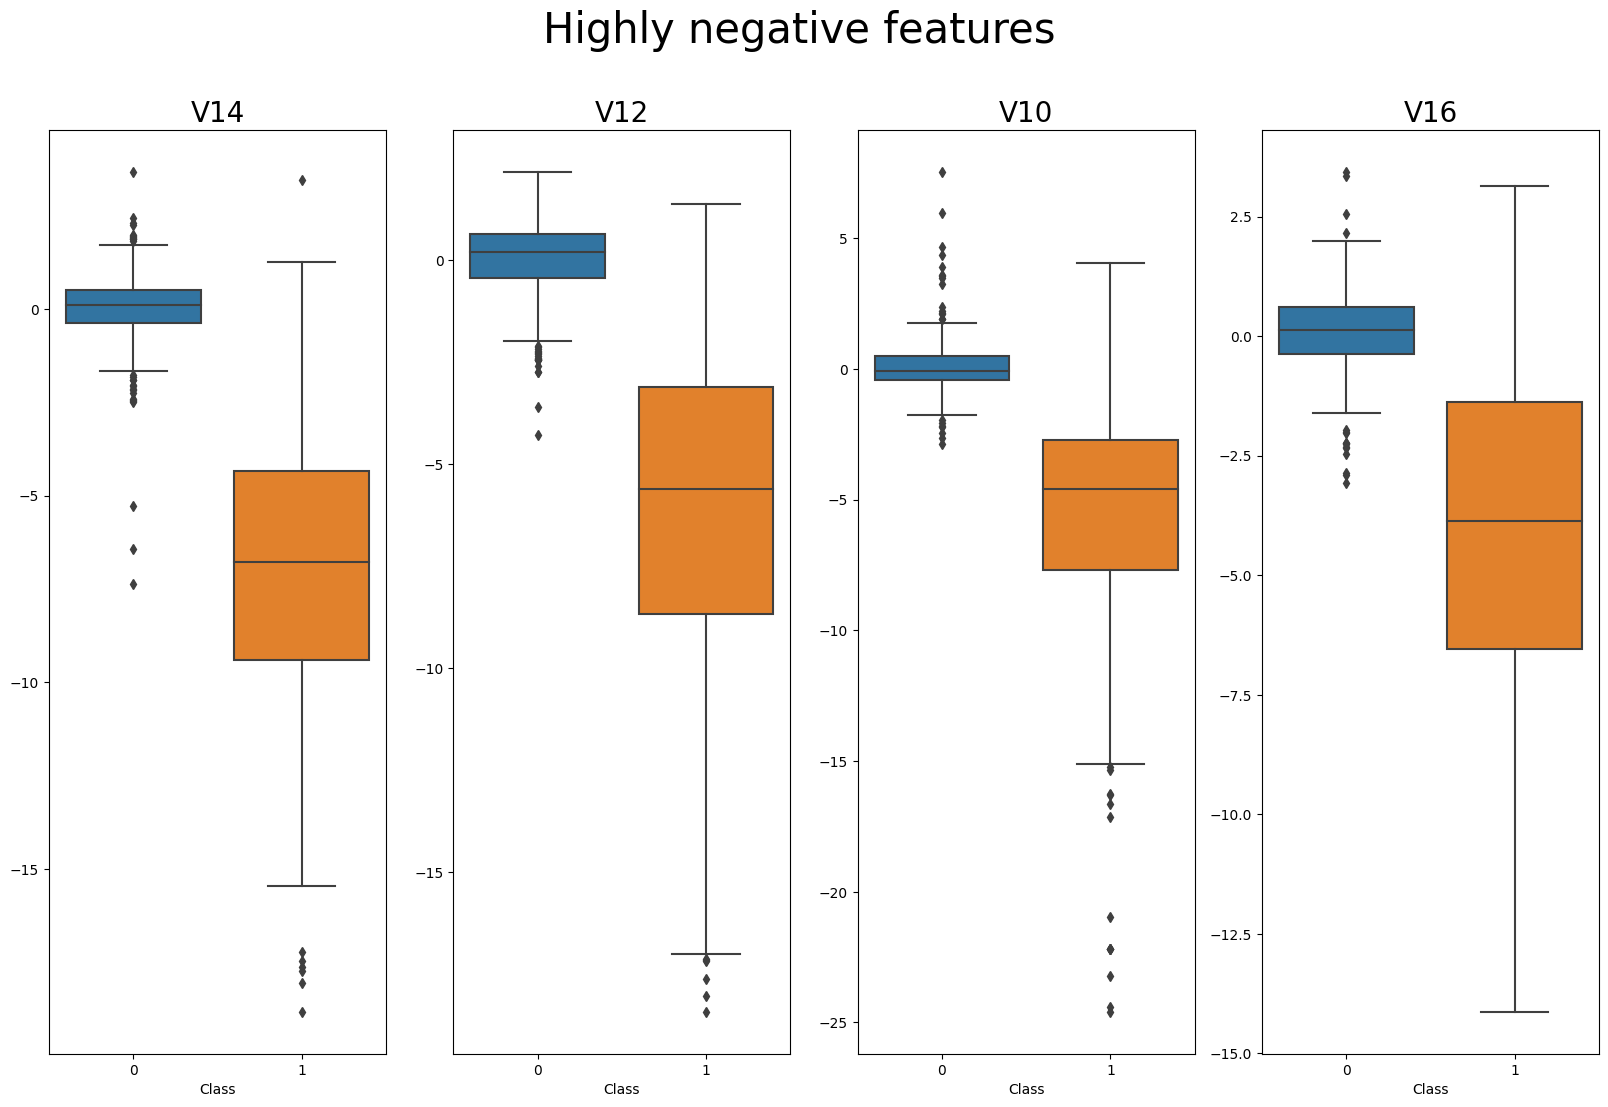

In [18]:
fig,ax=plt.subplots(1,4,figsize=(20,12))
for i,v in enumerate(highly_neg_corr_features):
    sns.boxplot(new_df,x='Class',y=v,ax=ax[i])
    ax[i].set_title(v,size=20)
    ax[i].set_ylabel('')
fig.suptitle('Highly negative features',size=30)
plt.show()

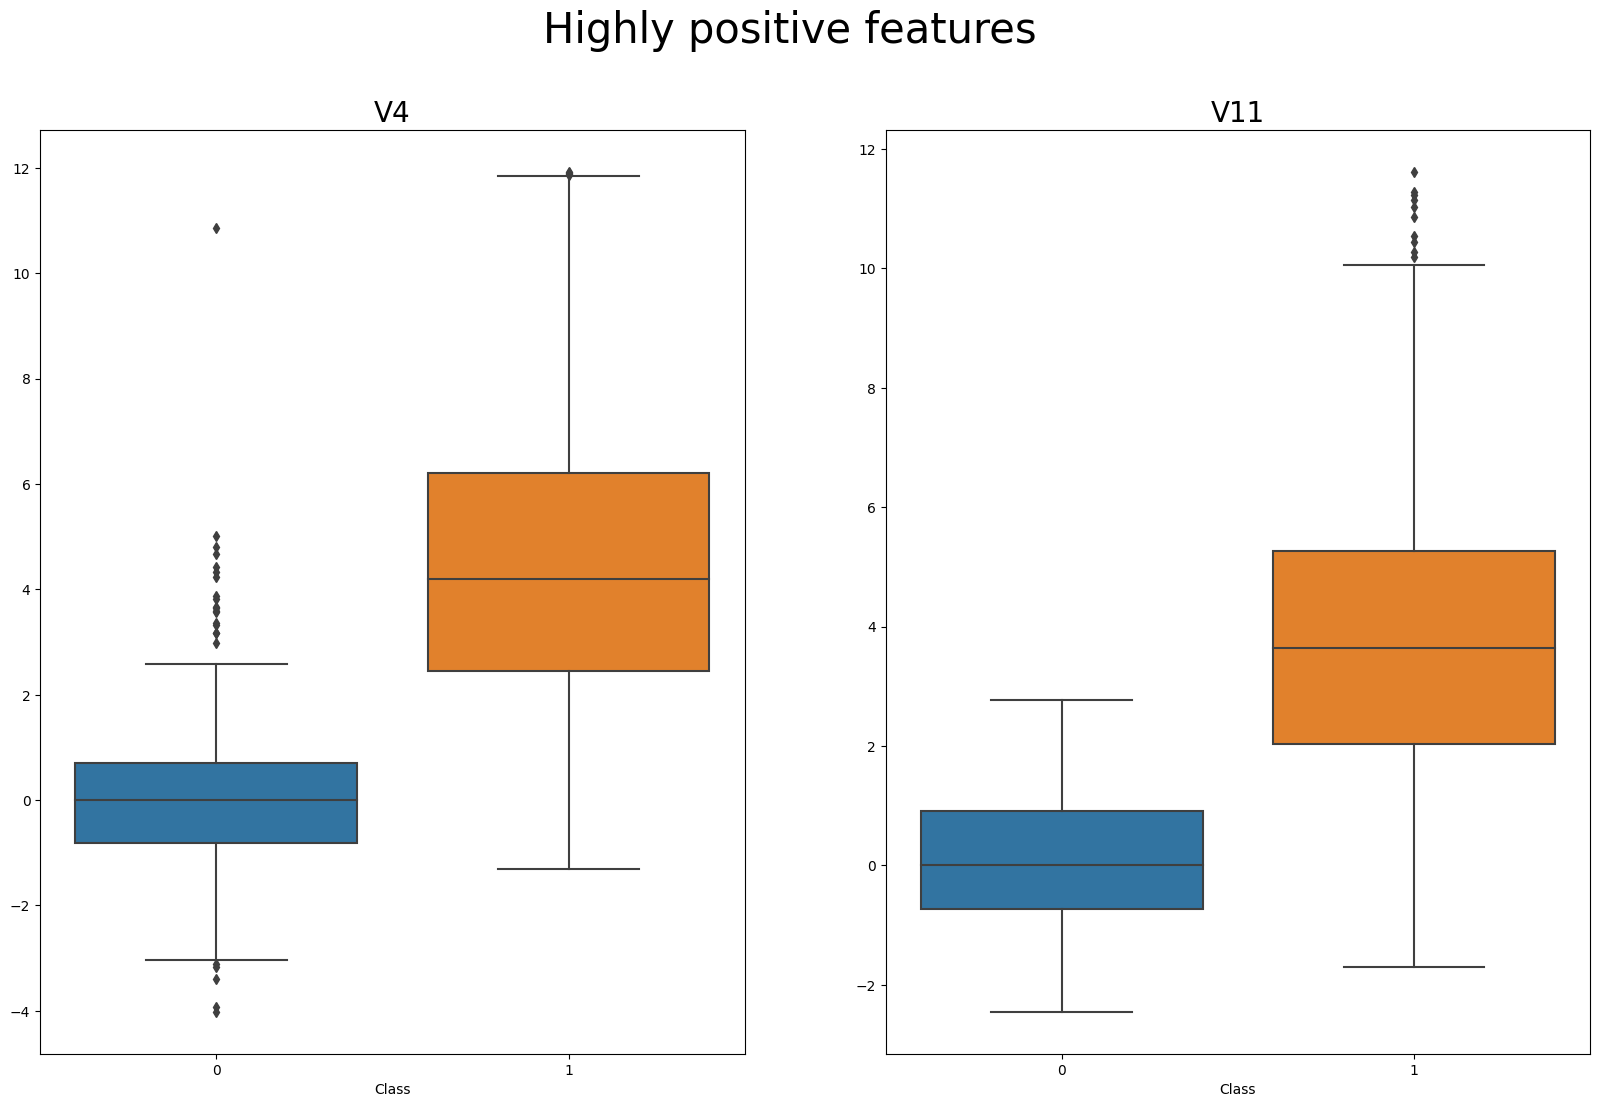

In [19]:
fig,ax=plt.subplots(1,2,figsize=(20,12))
for i,v in enumerate(highly_pos_corr_features):
    sns.boxplot(new_df,x='Class',y=v,ax=ax[i])
    ax[i].set_title(v,size=20)
    ax[i].set_ylabel('')
fig.suptitle('Highly positive features',size=30)
plt.show()

Anomaly Detection:

Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models. 

Interquartile Range Method: How to Use Statistics to Identify Outliers in Data by Jason Brownless (Machine Learning Mastery blog)


Determining the threshold: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold). 

In [20]:
len(new_df)

788

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


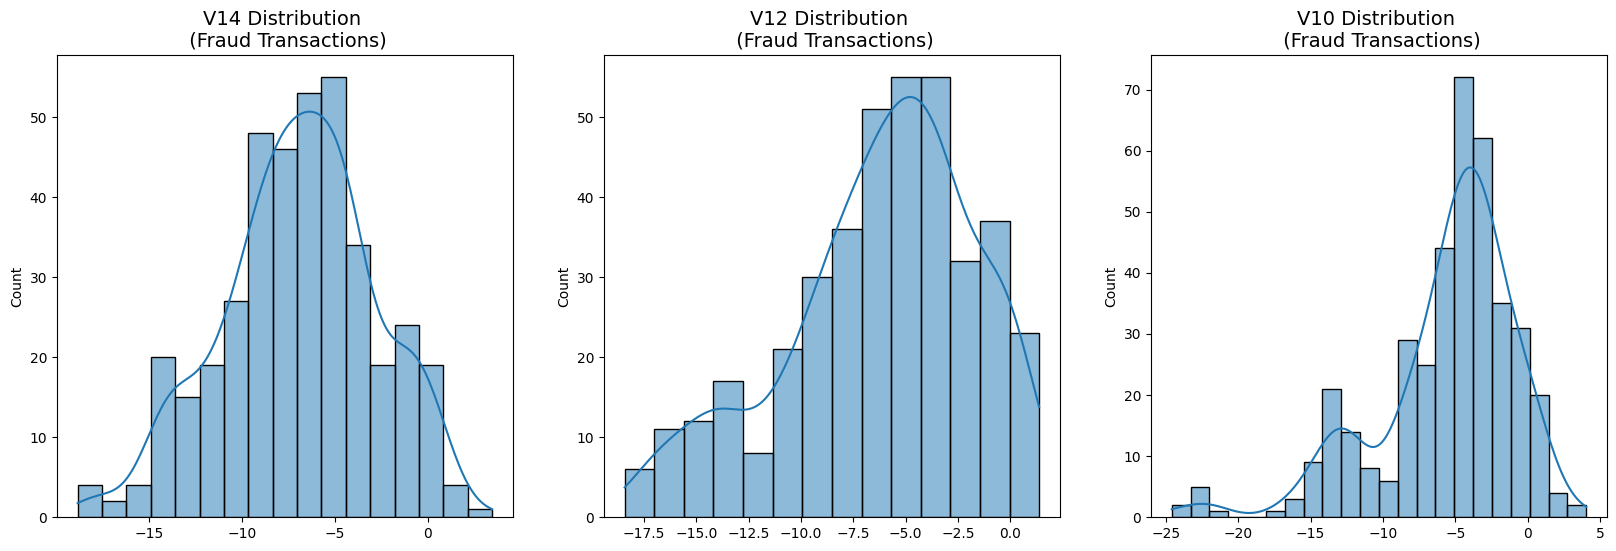

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_fraud_dist,ax=ax1,kde=True)
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.histplot(v12_fraud_dist,ax=ax2,kde=True)
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.histplot(v10_fraud_dist,ax=ax3,kde=True)
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)


plt.show()

In [22]:
# removing outliers for V14
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print(f'Quartile 25: {q25} | Quartile 75: {q75}')
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))
print('---------------------------------')

new_df=new_df.drop(new_df.loc[new_df['V14']<v14_lower].index)
new_df=new_df.drop(new_df.loc[new_df['V14']>v14_upper].index)



# removing outliers for V12
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print(f'Quartile 25: {q25} | Quartile 75: {q75}')
v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
print('---------------------------------')

new_df=new_df.drop(new_df.loc[new_df['V12']<v12_lower].index)
new_df=new_df.drop(new_df.loc[new_df['V12']>v12_upper].index)


# removing outliers for V10
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print(f'Quartile 25: {q25} | Quartile 75: {q75}')
v10_iqr = q75 - q25
print('iqr: {}'.format(v10_iqr))

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('Cut Off: {}'.format(v10_cut_off))
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
print('---------------------------------')

new_df=new_df.drop(new_df.loc[new_df['V10']<v10_lower].index)
new_df=new_df.drop(new_df.loc[new_df['V10']>v10_upper].index)


Quartile 25: -9.398536909286802 | Quartile 75: -4.347369340038723
iqr: 5.051167569248079
Cut Off: 7.576751353872119
V14 Lower: -16.975288263158923
V14 Upper: 3.229382013833396
---------------------------------
Quartile 25: -8.589204847677005 | Quartile 75: -3.0794409013702353
iqr: 5.509763946306769
Cut Off: 8.264645919460154
V12 Lower: -16.85385076713716
V12 Upper: 5.185205018089919
---------------------------------
Quartile 25: -6.99990663386522 | Quartile 75: -2.64940583024547
iqr: 4.350500803619751
Cut Off: 6.525751205429626
V10 Lower: -13.525657839294846
V10 Upper: 3.876345375184156
---------------------------------


In [23]:
len(new_df)

743

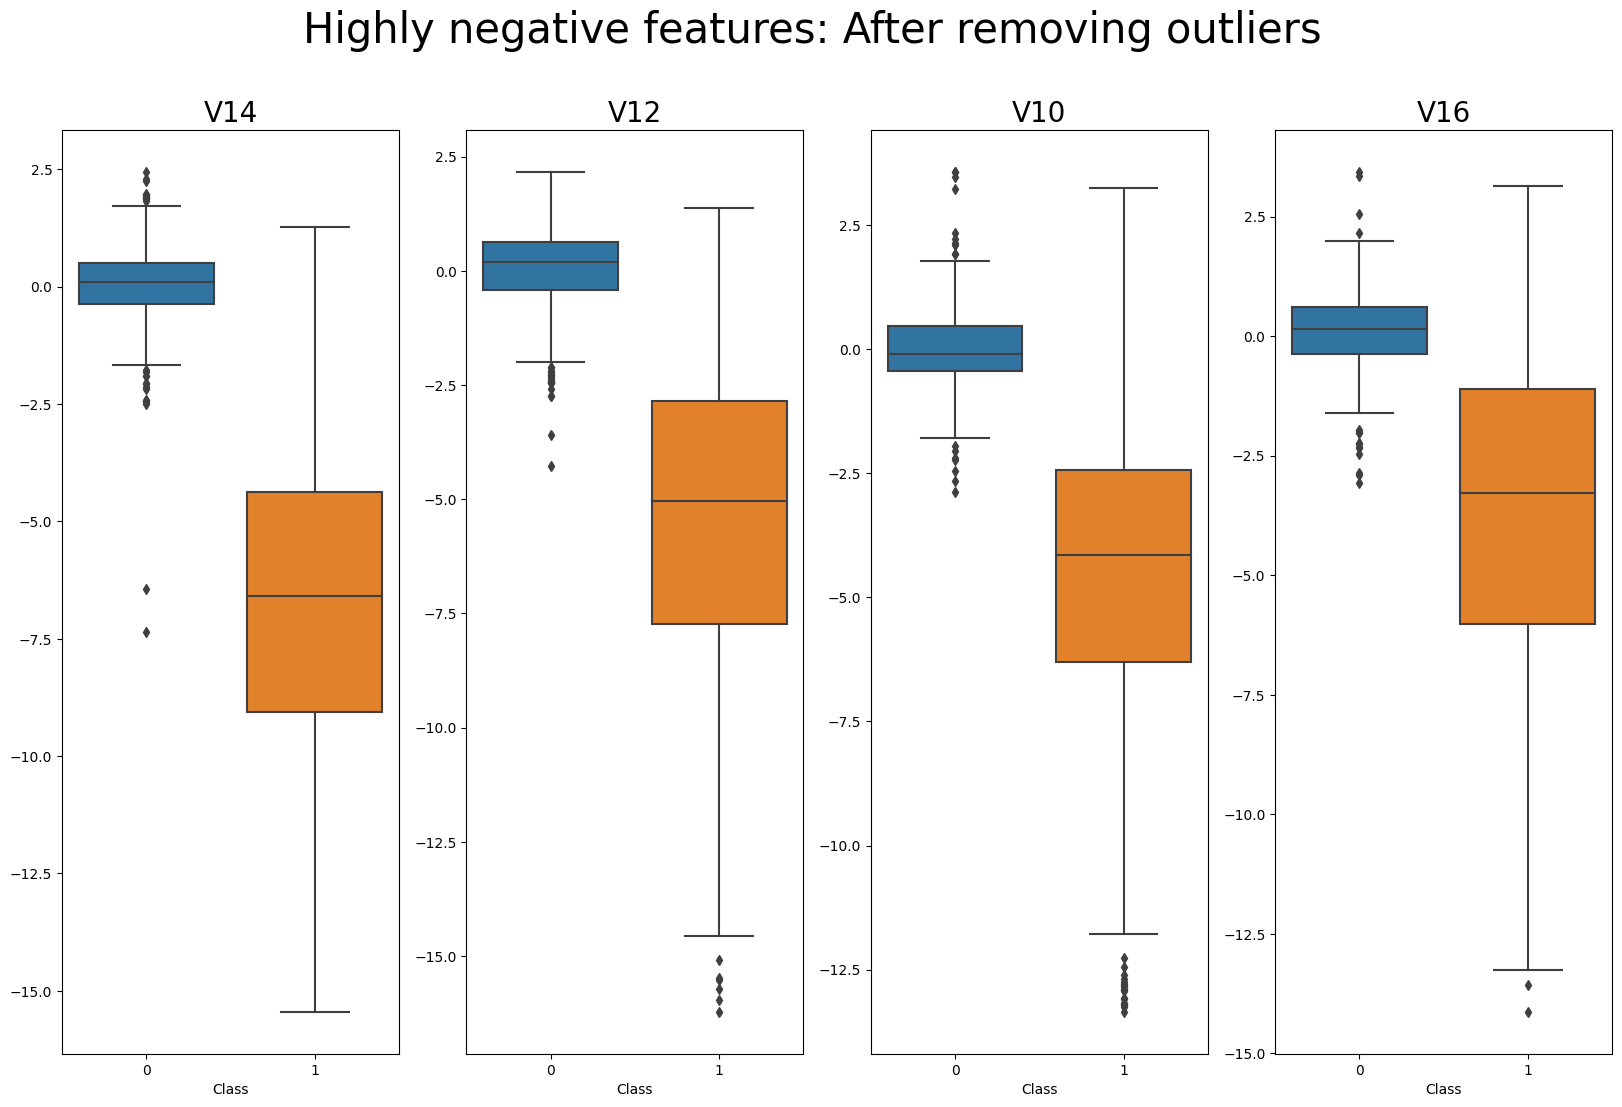

In [24]:
fig,ax=plt.subplots(1,4,figsize=(20,12))
for i,v in enumerate(highly_neg_corr_features):
    sns.boxplot(new_df,x='Class',y=v,ax=ax[i])
    ax[i].set_title(v,size=20)
    ax[i].set_ylabel('')
fig.suptitle('Highly negative features: After removing outliers',size=30)
plt.show()

### https://www.youtube.com/watch?v=NEaUSP4YerM
t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our limited small dataset

In [25]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 3.4 s
PCA took 0.016 s
Truncated SVD took 0.013 s


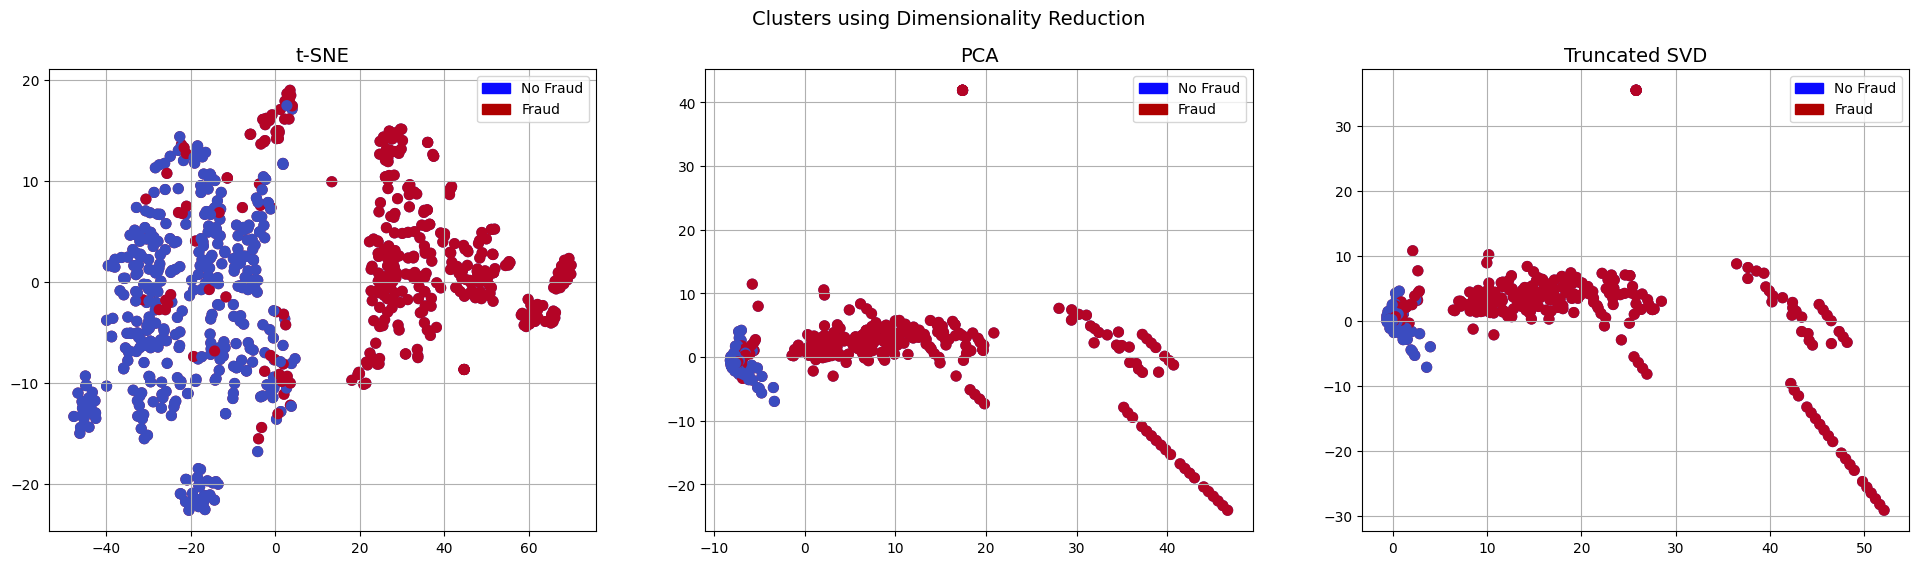

In [26]:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

### Model

In [27]:
FEATURES=list(new_df.drop(columns='Class').columns)
TARGET='Class'

Simple cross evaluation to choose appropariate models

In [28]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

classifiers={'logisticRegression':LogisticRegression(),
            'SupportVectorClf':SVC(),
            'DecisiontreeClf':DecisionTreeClassifier(),
            'XGBClf':xgboost.XGBClassifier()}
X=new_df[FEATURES]
y=new_df[TARGET]
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,stratify=new_df['Class'])



In [29]:
ss=StratifiedKFold(5)
for i,m in classifiers.items():
    cv_scores=cross_val_score(m,X_train,y_train,scoring='roc_auc',cv=ss)
    roc_auc_scores=np.mean(cv_scores)
    print(f'{i} ROC AUC Score: {roc_auc_scores}\n')
    
    

logisticRegression ROC AUC Score: 0.9782077922077923

SupportVectorClf ROC AUC Score: 0.9794008108293821

DecisiontreeClf ROC AUC Score: 0.8926637806637807

XGBClf ROC AUC Score: 0.9793994365422936



In [30]:
import optuna
def objective(trial):
        C = trial.suggest_float('C', 1e-5, 1e2)  
        svc = SVC(C=C,gamma='auto')
        score=np.mean(cross_val_score(svc,X_train,y_train,scoring='roc_auc',cv=ss))
        return score

study_svc = optuna.create_study(direction='maximize')
study_svc.optimize(objective, n_trials=30)

[I 2024-12-17 08:06:25,984] A new study created in memory with name: no-name-25a41d55-30a1-4c86-8575-5f9ed6106019
[I 2024-12-17 08:06:26,068] Trial 0 finished with value: 0.9773260496117638 and parameters: {'C': 1.3461360896880588}. Best is trial 0 with value: 0.9773260496117638.
[I 2024-12-17 08:06:26,163] Trial 1 finished with value: 0.9753914656771799 and parameters: {'C': 83.0263336068017}. Best is trial 0 with value: 0.9773260496117638.
[I 2024-12-17 08:06:26,241] Trial 2 finished with value: 0.9728777571634714 and parameters: {'C': 0.4991272725880991}. Best is trial 0 with value: 0.9773260496117638.
[I 2024-12-17 08:06:26,337] Trial 3 finished with value: 0.9753914656771799 and parameters: {'C': 76.71721024623953}. Best is trial 0 with value: 0.9773260496117638.
[I 2024-12-17 08:06:26,428] Trial 4 finished with value: 0.9753914656771799 and parameters: {'C': 89.03015251527022}. Best is trial 0 with value: 0.9773260496117638.
[I 2024-12-17 08:06:26,518] Trial 5 finished with value

In [31]:
from sklearn.metrics import roc_auc_score
def cross_validation_XGB(params):
    scores=[]
    skf=StratifiedKFold(5)
    for i, (train_index, valid_index) in enumerate(skf.split(X,y)):
            X_train=new_df.iloc[train_index][FEATURES]
            y_train=new_df.iloc[train_index][TARGET]
    
            X_valid=new_df.iloc[valid_index][FEATURES]
            y_valid=new_df.iloc[valid_index][TARGET]
        
            xgb=xgboost.XGBClassifier(**params,early_stopping_rounds=10)
            xgb.fit(X_train,y_train,eval_set=[(X_valid,y_valid)],verbose=100)
            pred=xgb.predict(X_train)
            scores.append(roc_auc_score(y_train,pred))
    return np.mean(scores)

In [32]:
def objective(trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3,log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 1),
        "lambda": trial.suggest_float("lambda", 1e-2, 10.0,log=True),
        "alpha": trial.suggest_float("alpha", 1e-2, 10.0,log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
    }

    score=cross_validation_XGB(params)
    print('Finish')
    return score
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=30)

[I 2024-12-17 08:06:28,891] A new study created in memory with name: no-name-506a2096-ef12-410a-8575-77240dd3b355


[0]	validation_0-logloss:0.59193
[61]	validation_0-logloss:0.14322
[0]	validation_0-logloss:0.60065
[46]	validation_0-logloss:0.22705
[0]	validation_0-logloss:0.59675
[51]	validation_0-logloss:0.18372
[0]	validation_0-logloss:0.59516
[49]	validation_0-logloss:0.18975
[0]	validation_0-logloss:0.59859
[59]	validation_0-logloss:0.18600


[I 2024-12-17 08:06:29,298] Trial 0 finished with value: 0.9527432210731457 and parameters: {'n_estimators': 773, 'max_depth': 7, 'learning_rate': 0.13937464678344888, 'subsample': 0.6152504449959965, 'colsample_bytree': 0.6079424338257211, 'gamma': 0.09883005846726911, 'lambda': 0.7290367308257688, 'alpha': 0.24007186386911233, 'min_child_weight': 9}. Best is trial 0 with value: 0.9527432210731457.


Finish
[0]	validation_0-logloss:0.67348
[100]	validation_0-logloss:0.18382
[200]	validation_0-logloss:0.14407
[300]	validation_0-logloss:0.13789
[308]	validation_0-logloss:0.13787
[0]	validation_0-logloss:0.67475
[100]	validation_0-logloss:0.24383
[200]	validation_0-logloss:0.21570
[240]	validation_0-logloss:0.21374
[0]	validation_0-logloss:0.67466
[100]	validation_0-logloss:0.21337
[181]	validation_0-logloss:0.18652
[0]	validation_0-logloss:0.67403
[100]	validation_0-logloss:0.20830
[200]	validation_0-logloss:0.17326
[300]	validation_0-logloss:0.16618
[323]	validation_0-logloss:0.16607
[0]	validation_0-logloss:0.67465
[100]	validation_0-logloss:0.22078
[200]	validation_0-logloss:0.17852
[270]	validation_0-logloss:0.17252


[I 2024-12-17 08:06:31,293] Trial 1 finished with value: 0.9642132047549271 and parameters: {'n_estimators': 901, 'max_depth': 10, 'learning_rate': 0.027905780583302373, 'subsample': 0.6789073450077163, 'colsample_bytree': 0.7293013620687266, 'gamma': 0.8966121868243094, 'lambda': 8.224751170908489, 'alpha': 0.6003330789353402, 'min_child_weight': 2}. Best is trial 1 with value: 0.9642132047549271.


Finish
[0]	validation_0-logloss:0.66703
[100]	validation_0-logloss:0.16101
[146]	validation_0-logloss:0.15230
[0]	validation_0-logloss:0.66891
[100]	validation_0-logloss:0.23791
[149]	validation_0-logloss:0.23189
[0]	validation_0-logloss:0.66820
[100]	validation_0-logloss:0.20484
[180]	validation_0-logloss:0.19317
[0]	validation_0-logloss:0.66873
[100]	validation_0-logloss:0.19321
[179]	validation_0-logloss:0.18355
[0]	validation_0-logloss:0.66878
[100]	validation_0-logloss:0.21317
[200]	validation_0-logloss:0.19222
[204]	validation_0-logloss:0.19253


[I 2024-12-17 08:06:32,267] Trial 2 finished with value: 0.9509531256619688 and parameters: {'n_estimators': 629, 'max_depth': 3, 'learning_rate': 0.032662617831056014, 'subsample': 0.7264584492058546, 'colsample_bytree': 0.8951272601217246, 'gamma': 0.3483123704387353, 'lambda': 0.11095757700942706, 'alpha': 1.586999266987985, 'min_child_weight': 10}. Best is trial 1 with value: 0.9642132047549271.


Finish
[0]	validation_0-logloss:0.68395
[100]	validation_0-logloss:0.30341
[200]	validation_0-logloss:0.19801
[300]	validation_0-logloss:0.16333
[400]	validation_0-logloss:0.15104
[500]	validation_0-logloss:0.14687
[561]	validation_0-logloss:0.14547
[0]	validation_0-logloss:0.68478
[100]	validation_0-logloss:0.34466
[200]	validation_0-logloss:0.25273
[300]	validation_0-logloss:0.22277
[400]	validation_0-logloss:0.21096
[431]	validation_0-logloss:0.21079
[0]	validation_0-logloss:0.68453
[100]	validation_0-logloss:0.32627
[200]	validation_0-logloss:0.22835
[300]	validation_0-logloss:0.19559
[400]	validation_0-logloss:0.18442
[454]	validation_0-logloss:0.18266
[0]	validation_0-logloss:0.68464
[100]	validation_0-logloss:0.32116
[200]	validation_0-logloss:0.22284
[300]	validation_0-logloss:0.19110
[400]	validation_0-logloss:0.17880
[491]	validation_0-logloss:0.17486
[0]	validation_0-logloss:0.68479
[100]	validation_0-logloss:0.32816
[200]	validation_0-logloss:0.23313
[300]	validation_0-logl

[I 2024-12-17 08:06:35,117] Trial 3 finished with value: 0.9634784101351184 and parameters: {'n_estimators': 822, 'max_depth': 8, 'learning_rate': 0.010159902311608494, 'subsample': 0.8130578291651414, 'colsample_bytree': 0.5607260498220743, 'gamma': 0.19680814791623424, 'lambda': 0.2829262606611373, 'alpha': 1.5032144241855565, 'min_child_weight': 5}. Best is trial 1 with value: 0.9642132047549271.


Finish
[0]	validation_0-logloss:0.67593
[100]	validation_0-logloss:0.18494
[180]	validation_0-logloss:0.14628
[0]	validation_0-logloss:0.67720
[100]	validation_0-logloss:0.24174
[180]	validation_0-logloss:0.20964
[0]	validation_0-logloss:0.67684
[100]	validation_0-logloss:0.21404
[180]	validation_0-logloss:0.18339
[0]	validation_0-logloss:0.67644
[100]	validation_0-logloss:0.21166
[180]	validation_0-logloss:0.17821
[0]	validation_0-logloss:0.67745
[100]	validation_0-logloss:0.21293
[180]	validation_0-logloss:0.16662


[I 2024-12-17 08:06:36,684] Trial 4 finished with value: 0.9714251925827343 and parameters: {'n_estimators': 181, 'max_depth': 7, 'learning_rate': 0.01989678505312289, 'subsample': 0.7792028254447709, 'colsample_bytree': 0.9902826447450839, 'gamma': 0.6913518192684589, 'lambda': 0.022867677071250866, 'alpha': 0.024018178577876314, 'min_child_weight': 4}. Best is trial 4 with value: 0.9714251925827343.


Finish
[0]	validation_0-logloss:0.65140
[81]	validation_0-logloss:0.15789
[0]	validation_0-logloss:0.65119
[74]	validation_0-logloss:0.22253
[0]	validation_0-logloss:0.65259
[73]	validation_0-logloss:0.19210
[0]	validation_0-logloss:0.65205
[81]	validation_0-logloss:0.18351
[0]	validation_0-logloss:0.65097
[98]	validation_0-logloss:0.16387


[I 2024-12-17 08:06:37,687] Trial 5 finished with value: 0.9993253066787824 and parameters: {'n_estimators': 739, 'max_depth': 9, 'learning_rate': 0.05315966056855798, 'subsample': 0.8094792312331455, 'colsample_bytree': 0.8226644309004515, 'gamma': 0.48508349405906026, 'lambda': 0.015143022997459435, 'alpha': 0.046251764475764075, 'min_child_weight': 1}. Best is trial 5 with value: 0.9993253066787824.


Finish
[0]	validation_0-logloss:0.67192
[100]	validation_0-logloss:0.18909
[163]	validation_0-logloss:0.16336
[0]	validation_0-logloss:0.67380
[100]	validation_0-logloss:0.26457
[163]	validation_0-logloss:0.24203
[0]	validation_0-logloss:0.67339
[100]	validation_0-logloss:0.23173
[163]	validation_0-logloss:0.20912
[0]	validation_0-logloss:0.67326
[100]	validation_0-logloss:0.21893
[163]	validation_0-logloss:0.19489
[0]	validation_0-logloss:0.67438
[100]	validation_0-logloss:0.24251
[163]	validation_0-logloss:0.21741


[I 2024-12-17 08:06:38,593] Trial 6 finished with value: 0.9442324155492022 and parameters: {'n_estimators': 164, 'max_depth': 4, 'learning_rate': 0.0279724540534661, 'subsample': 0.5711215519802605, 'colsample_bytree': 0.904312489370567, 'gamma': 0.44747247235466026, 'lambda': 0.02399026672706168, 'alpha': 5.444775546393568, 'min_child_weight': 9}. Best is trial 5 with value: 0.9993253066787824.


Finish
[0]	validation_0-logloss:0.66773
[100]	validation_0-logloss:0.16857
[114]	validation_0-logloss:0.16309
[0]	validation_0-logloss:0.67077
[100]	validation_0-logloss:0.23243
[114]	validation_0-logloss:0.22745
[0]	validation_0-logloss:0.66932
[100]	validation_0-logloss:0.19786
[114]	validation_0-logloss:0.19159
[0]	validation_0-logloss:0.66930
[100]	validation_0-logloss:0.19798
[114]	validation_0-logloss:0.19408
[0]	validation_0-logloss:0.66945
[100]	validation_0-logloss:0.20877
[114]	validation_0-logloss:0.20160


[I 2024-12-17 08:06:39,468] Trial 7 finished with value: 0.9579047086168082 and parameters: {'n_estimators': 115, 'max_depth': 7, 'learning_rate': 0.03456861661073456, 'subsample': 0.9331681553422777, 'colsample_bytree': 0.8306610602758623, 'gamma': 0.3794035531280362, 'lambda': 7.611004237454797, 'alpha': 0.7962642041605125, 'min_child_weight': 5}. Best is trial 5 with value: 0.9993253066787824.


Finish
[0]	validation_0-logloss:0.58042
[66]	validation_0-logloss:0.15358
[0]	validation_0-logloss:0.59082
[36]	validation_0-logloss:0.23055
[0]	validation_0-logloss:0.58623
[56]	validation_0-logloss:0.18696
[0]	validation_0-logloss:0.58894
[41]	validation_0-logloss:0.17753
[0]	validation_0-logloss:0.58782
[59]	validation_0-logloss:0.17148


[I 2024-12-17 08:06:39,871] Trial 8 finished with value: 0.9583189970650581 and parameters: {'n_estimators': 491, 'max_depth': 7, 'learning_rate': 0.15030262253064106, 'subsample': 0.8122010489523446, 'colsample_bytree': 0.6867499125993812, 'gamma': 0.3978028063225205, 'lambda': 0.12420176370251226, 'alpha': 0.09889094454839152, 'min_child_weight': 9}. Best is trial 5 with value: 0.9993253066787824.


Finish
[0]	validation_0-logloss:0.65735
[100]	validation_0-logloss:0.15280
[136]	validation_0-logloss:0.14953
[0]	validation_0-logloss:0.66033
[100]	validation_0-logloss:0.22295
[124]	validation_0-logloss:0.22044
[0]	validation_0-logloss:0.65993
[100]	validation_0-logloss:0.18703
[131]	validation_0-logloss:0.18439
[0]	validation_0-logloss:0.66053
[100]	validation_0-logloss:0.18222
[149]	validation_0-logloss:0.17742
[0]	validation_0-logloss:0.66023
[100]	validation_0-logloss:0.18892
[189]	validation_0-logloss:0.17507


[I 2024-12-17 08:06:40,856] Trial 9 finished with value: 0.9596357399661949 and parameters: {'n_estimators': 569, 'max_depth': 8, 'learning_rate': 0.04751546314956365, 'subsample': 0.7604623037378473, 'colsample_bytree': 0.9569220889202126, 'gamma': 0.7065085681244028, 'lambda': 2.766887053093206, 'alpha': 1.5123077114024182, 'min_child_weight': 6}. Best is trial 5 with value: 0.9993253066787824.


Finish
[0]	validation_0-logloss:0.49925
[20]	validation_0-logloss:0.17306
[0]	validation_0-logloss:0.50545
[27]	validation_0-logloss:0.22713
[0]	validation_0-logloss:0.48573
[18]	validation_0-logloss:0.19777
[0]	validation_0-logloss:0.49669
[23]	validation_0-logloss:0.18994
[0]	validation_0-logloss:0.50362
[38]	validation_0-logloss:0.17626


[I 2024-12-17 08:06:41,307] Trial 10 finished with value: 0.9993253066787824 and parameters: {'n_estimators': 382, 'max_depth': 10, 'learning_rate': 0.2873566556202261, 'subsample': 0.9806345189436354, 'colsample_bytree': 0.803447597823722, 'gamma': 0.6544747686654826, 'lambda': 0.013446169849596627, 'alpha': 0.01209236308202065, 'min_child_weight': 1}. Best is trial 5 with value: 0.9993253066787824.


Finish
[0]	validation_0-logloss:0.50485
[22]	validation_0-logloss:0.17568
[0]	validation_0-logloss:0.52166
[28]	validation_0-logloss:0.25204
[0]	validation_0-logloss:0.50416
[23]	validation_0-logloss:0.20832
[0]	validation_0-logloss:0.51386
[23]	validation_0-logloss:0.20593
[0]	validation_0-logloss:0.52028
[31]	validation_0-logloss:0.17503


[I 2024-12-17 08:06:41,760] Trial 11 finished with value: 0.9996774193548387 and parameters: {'n_estimators': 378, 'max_depth': 10, 'learning_rate': 0.25698146076704864, 'subsample': 0.9880356359896728, 'colsample_bytree': 0.8062032890926794, 'gamma': 0.6557138168072667, 'lambda': 0.012508815039364235, 'alpha': 0.011207856019849393, 'min_child_weight': 1}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.62887
[77]	validation_0-logloss:0.15942
[0]	validation_0-logloss:0.63193
[66]	validation_0-logloss:0.20809
[0]	validation_0-logloss:0.63324
[58]	validation_0-logloss:0.19912
[0]	validation_0-logloss:0.62818
[83]	validation_0-logloss:0.16852
[0]	validation_0-logloss:0.63265
[100]	validation_0-logloss:0.15867
[112]	validation_0-logloss:0.15963


[I 2024-12-17 08:06:42,537] Trial 12 finished with value: 0.9972727319210357 and parameters: {'n_estimators': 371, 'max_depth': 9, 'learning_rate': 0.08055068094986109, 'subsample': 0.8948564450365546, 'colsample_bytree': 0.8026644210177161, 'gamma': 0.9738313534273275, 'lambda': 0.05181753648467214, 'alpha': 0.03943193266563869, 'min_child_weight': 2}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.63061
[61]	validation_0-logloss:0.14614
[0]	validation_0-logloss:0.63402
[73]	validation_0-logloss:0.22275
[0]	validation_0-logloss:0.63164
[51]	validation_0-logloss:0.20003
[0]	validation_0-logloss:0.62964
[56]	validation_0-logloss:0.16916
[0]	validation_0-logloss:0.63032
[70]	validation_0-logloss:0.17034


[I 2024-12-17 08:06:43,234] Trial 13 finished with value: 0.9996478873239436 and parameters: {'n_estimators': 702, 'max_depth': 5, 'learning_rate': 0.08176847043946456, 'subsample': 0.8864631541756147, 'colsample_bytree': 0.6680662155032919, 'gamma': 0.605612553056065, 'lambda': 0.010664598123332045, 'alpha': 0.07125710652901499, 'min_child_weight': 1}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.48800
[19]	validation_0-logloss:0.18862
[0]	validation_0-logloss:0.51304
[28]	validation_0-logloss:0.22705
[0]	validation_0-logloss:0.49621
[21]	validation_0-logloss:0.20536
[0]	validation_0-logloss:0.50588
[33]	validation_0-logloss:0.16893
[0]	validation_0-logloss:0.49037
[57]	validation_0-logloss:0.15260
Finish


[I 2024-12-17 08:06:43,633] Trial 14 finished with value: 0.9875021730841432 and parameters: {'n_estimators': 331, 'max_depth': 5, 'learning_rate': 0.2989754531001711, 'subsample': 0.9949309526280549, 'colsample_bytree': 0.6652379942993251, 'gamma': 0.7995753174142638, 'lambda': 0.048377851158826944, 'alpha': 0.010615206195106926, 'min_child_weight': 3}. Best is trial 11 with value: 0.9996774193548387.


[0]	validation_0-logloss:0.60230
[57]	validation_0-logloss:0.15158
[0]	validation_0-logloss:0.61366
[46]	validation_0-logloss:0.21930
[0]	validation_0-logloss:0.61046
[63]	validation_0-logloss:0.18177
[0]	validation_0-logloss:0.60479
[49]	validation_0-logloss:0.17961
[0]	validation_0-logloss:0.60783
[74]	validation_0-logloss:0.17627


[I 2024-12-17 08:06:44,138] Trial 15 finished with value: 0.965209441484505 and parameters: {'n_estimators': 970, 'max_depth': 5, 'learning_rate': 0.11691050297126207, 'subsample': 0.890626424669207, 'colsample_bytree': 0.5217973260348527, 'gamma': 0.5948386346615848, 'lambda': 0.010374867713293033, 'alpha': 0.13028869931287043, 'min_child_weight': 7}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.53843
[32]	validation_0-logloss:0.16628
[0]	validation_0-logloss:0.56097
[31]	validation_0-logloss:0.20496
[0]	validation_0-logloss:0.54792
[33]	validation_0-logloss:0.18441
[0]	validation_0-logloss:0.53833
[25]	validation_0-logloss:0.17543
[0]	validation_0-logloss:0.54242
[50]	validation_0-logloss:0.17451


[I 2024-12-17 08:06:44,579] Trial 16 finished with value: 0.983719604213811 and parameters: {'n_estimators': 630, 'max_depth': 5, 'learning_rate': 0.21438811932926907, 'subsample': 0.8889435702703731, 'colsample_bytree': 0.6421659581982799, 'gamma': 0.8053420079668918, 'lambda': 0.687995149351015, 'alpha': 0.06995601113207756, 'min_child_weight': 3}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.61626
[53]	validation_0-logloss:0.14981
[0]	validation_0-logloss:0.62467
[60]	validation_0-logloss:0.21650
[0]	validation_0-logloss:0.62205
[46]	validation_0-logloss:0.19623
[0]	validation_0-logloss:0.62137
[55]	validation_0-logloss:0.18280
[0]	validation_0-logloss:0.62289
[60]	validation_0-logloss:0.16495


[I 2024-12-17 08:06:45,312] Trial 17 finished with value: 0.9996478873239436 and parameters: {'n_estimators': 496, 'max_depth': 6, 'learning_rate': 0.09518081595566864, 'subsample': 0.9450539936655622, 'colsample_bytree': 0.73087248627939, 'gamma': 0.6155554266153955, 'lambda': 0.04853092978622309, 'alpha': 0.019806159032659, 'min_child_weight': 1}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.63454
[100]	validation_0-logloss:0.14101
[134]	validation_0-logloss:0.13916
[0]	validation_0-logloss:0.64245
[62]	validation_0-logloss:0.19989
[0]	validation_0-logloss:0.63990
[76]	validation_0-logloss:0.18968
[0]	validation_0-logloss:0.63854
[67]	validation_0-logloss:0.17990
[0]	validation_0-logloss:0.63705
[84]	validation_0-logloss:0.16044


[I 2024-12-17 08:06:45,984] Trial 18 finished with value: 0.9770305006055418 and parameters: {'n_estimators': 274, 'max_depth': 3, 'learning_rate': 0.07292303711798188, 'subsample': 0.8650759831818408, 'colsample_bytree': 0.5767669002762191, 'gamma': 0.2131467282581161, 'lambda': 0.10630396266128438, 'alpha': 0.20812285629203453, 'min_child_weight': 3}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.55527
[30]	validation_0-logloss:0.16754
[0]	validation_0-logloss:0.57472
[34]	validation_0-logloss:0.23808
[0]	validation_0-logloss:0.56834
[41]	validation_0-logloss:0.18204
[0]	validation_0-logloss:0.55981
[60]	validation_0-logloss:0.17792
[0]	validation_0-logloss:0.56682
[83]	validation_0-logloss:0.16223


[I 2024-12-17 08:06:48,011] Trial 19 finished with value: 0.973921587819626 and parameters: {'n_estimators': 458, 'max_depth': 6, 'learning_rate': 0.18473917360119774, 'subsample': 0.9423401755889063, 'colsample_bytree': 0.7631426128785155, 'gamma': 0.5727169073421308, 'lambda': 0.028344677989293958, 'alpha': 0.03053254667465701, 'min_child_weight': 7}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.67801
[100]	validation_0-logloss:0.20749
[200]	validation_0-logloss:0.16507
[279]	validation_0-logloss:0.15883
[0]	validation_0-logloss:0.67864
[100]	validation_0-logloss:0.25464
[200]	validation_0-logloss:0.20931
[261]	validation_0-logloss:0.20386
[0]	validation_0-logloss:0.67851
[100]	validation_0-logloss:0.22785
[200]	validation_0-logloss:0.18311
[216]	validation_0-logloss:0.18378
[0]	validation_0-logloss:0.67870
[100]	validation_0-logloss:0.22261
[200]	validation_0-logloss:0.18300
[232]	validation_0-logloss:0.18235
[0]	validation_0-logloss:0.67805
[100]	validation_0-logloss:0.22552
[200]	validation_0-logloss:0.16685
[300]	validation_0-logloss:0.15228
[304]	validation_0-logloss:0.15218


[I 2024-12-17 08:06:50,163] Trial 20 finished with value: 0.9884994470505222 and parameters: {'n_estimators': 676, 'max_depth': 4, 'learning_rate': 0.017571626706135622, 'subsample': 0.9975979882747074, 'colsample_bytree': 0.882485410244064, 'gamma': 0.7542772186805011, 'lambda': 0.26090177818531446, 'alpha': 0.06443074925409316, 'min_child_weight': 2}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.61748
[60]	validation_0-logloss:0.14850
[0]	validation_0-logloss:0.62550
[51]	validation_0-logloss:0.21724
[0]	validation_0-logloss:0.62427
[50]	validation_0-logloss:0.20053
[0]	validation_0-logloss:0.62280
[53]	validation_0-logloss:0.18573
[0]	validation_0-logloss:0.62377
[66]	validation_0-logloss:0.16418


[I 2024-12-17 08:06:50,981] Trial 21 finished with value: 0.9996478873239436 and parameters: {'n_estimators': 506, 'max_depth': 5, 'learning_rate': 0.09396727156030064, 'subsample': 0.9452023980718749, 'colsample_bytree': 0.7103905110411171, 'gamma': 0.5796597809771357, 'lambda': 0.05789851159504586, 'alpha': 0.019386701465849098, 'min_child_weight': 1}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.61366
[46]	validation_0-logloss:0.15990
[0]	validation_0-logloss:0.62051
[37]	validation_0-logloss:0.21739
[0]	validation_0-logloss:0.61338
[42]	validation_0-logloss:0.19829
[0]	validation_0-logloss:0.61585
[64]	validation_0-logloss:0.17802
[0]	validation_0-logloss:0.61502
[49]	validation_0-logloss:0.17081


[I 2024-12-17 08:06:51,659] Trial 22 finished with value: 0.998973194002726 and parameters: {'n_estimators': 414, 'max_depth': 6, 'learning_rate': 0.10401310760061089, 'subsample': 0.8503115298370887, 'colsample_bytree': 0.7554001972789178, 'gamma': 0.5162436449721264, 'lambda': 0.010600713064504845, 'alpha': 0.01626692634703033, 'min_child_weight': 1}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.63799
[97]	validation_0-logloss:0.13435
[0]	validation_0-logloss:0.63926
[60]	validation_0-logloss:0.19735
[0]	validation_0-logloss:0.64236
[76]	validation_0-logloss:0.17178
[0]	validation_0-logloss:0.64140
[82]	validation_0-logloss:0.17087
[0]	validation_0-logloss:0.63943
[73]	validation_0-logloss:0.17572


[I 2024-12-17 08:06:52,382] Trial 23 finished with value: 0.9784083820420708 and parameters: {'n_estimators': 281, 'max_depth': 6, 'learning_rate': 0.06768878533052097, 'subsample': 0.5049270930926395, 'colsample_bytree': 0.6290684221774997, 'gamma': 0.8666986720495028, 'lambda': 0.03522647286620169, 'alpha': 0.02769303179699635, 'min_child_weight': 2}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.53997
[34]	validation_0-logloss:0.15484
[0]	validation_0-logloss:0.55561
[30]	validation_0-logloss:0.21990
[0]	validation_0-logloss:0.54522
[26]	validation_0-logloss:0.19020
[0]	validation_0-logloss:0.54486
[37]	validation_0-logloss:0.17691
[0]	validation_0-logloss:0.54013
[38]	validation_0-logloss:0.15250


[I 2024-12-17 08:06:52,819] Trial 24 finished with value: 0.9812558527182178 and parameters: {'n_estimators': 541, 'max_depth': 4, 'learning_rate': 0.21313208480082535, 'subsample': 0.9336056802541866, 'colsample_bytree': 0.7722540878842116, 'gamma': 0.6398957307154998, 'lambda': 0.018487837096558938, 'alpha': 0.12471934082101863, 'min_child_weight': 4}. Best is trial 11 with value: 0.9996774193548387.


Finish
[0]	validation_0-logloss:0.65484
[92]	validation_0-logloss:0.14395
[0]	validation_0-logloss:0.65794
[100]	validation_0-logloss:0.21836
[109]	validation_0-logloss:0.22218
[0]	validation_0-logloss:0.65664
[81]	validation_0-logloss:0.18534
[0]	validation_0-logloss:0.65619
[82]	validation_0-logloss:0.17486
[0]	validation_0-logloss:0.65815
[100]	validation_0-logloss:0.16396
[129]	validation_0-logloss:0.16266


[I 2024-12-17 08:06:54,123] Trial 25 finished with value: 1.0 and parameters: {'n_estimators': 608, 'max_depth': 8, 'learning_rate': 0.046204098951992525, 'subsample': 0.9559602162149912, 'colsample_bytree': 0.7115419598379333, 'gamma': 0.28817965103369253, 'lambda': 0.07330046794719966, 'alpha': 0.010283004843798531, 'min_child_weight': 1}. Best is trial 25 with value: 1.0.


Finish
[0]	validation_0-logloss:0.65858
[100]	validation_0-logloss:0.14904
[149]	validation_0-logloss:0.14408
[0]	validation_0-logloss:0.66282
[100]	validation_0-logloss:0.20569
[108]	validation_0-logloss:0.20642
[0]	validation_0-logloss:0.66044
[97]	validation_0-logloss:0.18024
[0]	validation_0-logloss:0.66049
[100]	validation_0-logloss:0.17595
[108]	validation_0-logloss:0.17642
[0]	validation_0-logloss:0.65999
[100]	validation_0-logloss:0.16360
[149]	validation_0-logloss:0.15569


[I 2024-12-17 08:06:55,204] Trial 26 finished with value: 0.987915424295592 and parameters: {'n_estimators': 710, 'max_depth': 9, 'learning_rate': 0.041932012255761174, 'subsample': 0.8501099892269569, 'colsample_bytree': 0.690019662059243, 'gamma': 0.27930795794855046, 'lambda': 0.08417516004396164, 'alpha': 0.010954280431764923, 'min_child_weight': 3}. Best is trial 25 with value: 1.0.


Finish
[0]	validation_0-logloss:0.64603
[70]	validation_0-logloss:0.15530
[0]	validation_0-logloss:0.64795
[82]	validation_0-logloss:0.21333
[0]	validation_0-logloss:0.64769
[58]	validation_0-logloss:0.18814
[0]	validation_0-logloss:0.64662
[72]	validation_0-logloss:0.16885
[0]	validation_0-logloss:0.64848
[81]	validation_0-logloss:0.16472


[I 2024-12-17 08:06:56,180] Trial 27 finished with value: 0.9973022639519307 and parameters: {'n_estimators': 834, 'max_depth': 8, 'learning_rate': 0.05894966970761059, 'subsample': 0.964310029251539, 'colsample_bytree': 0.8389081055723422, 'gamma': 0.050359495590864195, 'lambda': 0.16784722693511026, 'alpha': 0.04827730859038066, 'min_child_weight': 2}. Best is trial 25 with value: 1.0.


Finish
[0]	validation_0-logloss:0.67531
[100]	validation_0-logloss:0.18954
[200]	validation_0-logloss:0.15298
[250]	validation_0-logloss:0.14947
[0]	validation_0-logloss:0.67777
[100]	validation_0-logloss:0.24493
[197]	validation_0-logloss:0.20878
[0]	validation_0-logloss:0.67701
[100]	validation_0-logloss:0.22089
[200]	validation_0-logloss:0.19216
[205]	validation_0-logloss:0.19217
[0]	validation_0-logloss:0.67647
[100]	validation_0-logloss:0.21366
[200]	validation_0-logloss:0.17750
[291]	validation_0-logloss:0.17103
[0]	validation_0-logloss:0.67640
[100]	validation_0-logloss:0.21526
[200]	validation_0-logloss:0.16594
[256]	validation_0-logloss:0.15864


[I 2024-12-17 08:06:58,147] Trial 28 finished with value: 0.9787604947181274 and parameters: {'n_estimators': 610, 'max_depth': 10, 'learning_rate': 0.02048853619243687, 'subsample': 0.9042948585766336, 'colsample_bytree': 0.8610394347301178, 'gamma': 0.3126934900737175, 'lambda': 0.5528286727812743, 'alpha': 0.38923850911255814, 'min_child_weight': 4}. Best is trial 25 with value: 1.0.


Finish
[0]	validation_0-logloss:0.59152
[42]	validation_0-logloss:0.14189
[0]	validation_0-logloss:0.59601
[34]	validation_0-logloss:0.21281
[0]	validation_0-logloss:0.59085
[46]	validation_0-logloss:0.18899
[0]	validation_0-logloss:0.59192
[44]	validation_0-logloss:0.18171
[0]	validation_0-logloss:0.59417
[43]	validation_0-logloss:0.17523


[I 2024-12-17 08:06:58,756] Trial 29 finished with value: 0.9979769572731483 and parameters: {'n_estimators': 777, 'max_depth': 9, 'learning_rate': 0.1382473737715134, 'subsample': 0.712339210057367, 'colsample_bytree': 0.6079333116690663, 'gamma': 0.12292829450735246, 'lambda': 0.031834254137987426, 'alpha': 0.22786231739130622, 'min_child_weight': 1}. Best is trial 25 with value: 1.0.


Finish


In [33]:
optuna.visualization.plot_optimization_history(study_svc)


In [34]:
optuna.visualization.plot_optimization_history(study_xgb)

In [35]:
svc_best_params=study_svc.best_params
xgb_best_params=study_xgb.best_params
print(f'SVC best score: {study_svc.best_value}')
print(f'XGB best score: {study_xgb.best_value}')

SVC best score: 0.9793998488284202
XGB best score: 1.0


In [36]:
svc_best_params

{'C': 4.685045455373057}

### Validation Scores

In [37]:
from sklearn.metrics import roc_auc_score

svcclf=SVC(**svc_best_params)
xgbclf=xgboost.XGBClassifier(**xgb_best_params)

svcclf.fit(X_train,y_train)
pred=svcclf.predict(X_valid)
score_svc=roc_auc_score(y_valid,pred)
print(f'SVC ROCAUC score on validation set {score_svc}')

xgbclf.fit(X_train,y_train)
pred=xgbclf.predict(X_valid)
score_xgb=roc_auc_score(y_valid,pred)
print(f'XGBClassifier ROCAUC score on validation set {score_xgb}')

SVC ROCAUC score on validation set 0.9392523364485981
XGBClassifier ROCAUC score on validation set 0.9353045439896873


In [38]:
score_svc

0.9392523364485981

### Holdout set scores

In [39]:
pred=svcclf.predict(X_holdout_)
score_svc=roc_auc_score(y_holdout,pred)
print(f'SVC ROCAUC score on holdout set {score_svc}')

pred=xgbclf.predict(X_holdout_)
score_xgb=roc_auc_score(y_holdout,pred)
print(f'xgbclf ROCAUC score on holdout set {score_xgb}')

SVC ROCAUC score on holdout set 0.9315565315884372
xgbclf ROCAUC score on holdout set 0.9390391180388868


xgb best params
{'n_estimators': 496,
 'max_depth': 8,
 'learning_rate': 0.28675311672879755,
 'subsample': 0.9310048745036565,
 'colsample_bytree': 0.5811755362283119,
 'gamma': 0.15877142989450677,
 'lambda': 1.0544105860998902,
 'alpha': 0.23147804064656355,
 'min_child_weight': 2}

In [40]:
p={'n_estimators': 496,
 'max_depth': 8,
 'learning_rate': 0.28675311672879755,
 'subsample': 0.9310048745036565,
 'colsample_bytree': 0.5811755362283119,
 'gamma': 0.15877142989450677,
 'lambda': 1.0544105860998902,
 'alpha': 0.23147804064656355,
 'min_child_weight': 2}

c=xgboost.XGBClassifier(**p)
c.fit(X_train,y_train)
pred=c.predict(X_holdout_)
score_xgb=roc_auc_score(y_holdout,pred)
print(f'c ROCAUC score on holdout set {score_xgb}')


c ROCAUC score on holdout set 0.9355813512799606
